# 한글

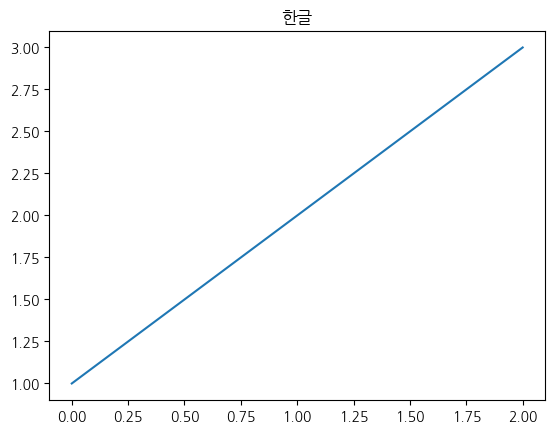

In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

plt.rc("font", family="NanumGothic") # 라이브러리 불러오기와 함께 한번만 실행
from sklearn.preprocessing import MinMaxScaler, StandardScaler

plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

# 데이터 불러오기
울산 / 부산 / 인천 / 광양(대체왜???)

In [2]:
ULS = pd.read_csv("data/전처리ver1/울산_전처리ver1.csv")
PUS = pd.read_csv("data/전처리ver1/부산_전처리ver1.csv")
INC = pd.read_csv("data/전처리ver1/인천_전처리ver1.csv")
KAN = pd.read_csv("data/전처리ver1/광양_전처리ver1.csv")

# 데이터 확인

In [3]:
ULS.head(3)

,항명,호출부호,선박명,입항횟수_연도,입항횟수_횟수,구분,입출,총톤수,입항일시,출항일시,수리일시,항해구분,계선장소_코드,계선장소_숫자,계선장소명,선박용도,순번,시설사용횟수,신고톤수,지정시설_코드,지정시설_번호,지정시설명,지정일시(FROM),지정일시(TO),사용목적명,예보일시,허가유무,접안_대기시간,출항_대기시간,Service_Time_End,Anchor,Service_Time_Start,Service_Time,접안_대기시간_NumDays,Service_Time_NumDays,접안_대기시간_일,접안_대기시간_시간,접안_대기시간_분,Service_Time_일,Service_Time_시간,Service_Time_분,대기율
0,울산,936013,해바다201호,2010.0,1.0,최종,출항,11,2010-11-10 06:00,2022-03-28 05:55,2022-04-20 16:29,기타,MLJ,1,장생포호안,기타선,2632.0,1.0,11.0,MLJ,1.0,장생포호안,2010-11-10 06:00:00,2022-03-28 05:55:00,기타,2022-04-20,허가완료,0 days 00:00:00,NaN,2022-03-28 05:55:00,NaN,2010-11-10 06:00:00,4155 days 23:55:00,0,4155,0,0,0,4155,23,5984635,0.0
1,울산,814441,에스엠103호,2012.0,1.0,최종,출항,19.77,2012-04-28 19:00,2022-10-14 10:31,2022-11-29 16:35,기타,MLJ,1,장생포호안,기타선,4197.0,1.0,19.0,MLJ,1.0,장생포호안,2012-04-08 19:00:00,2022-10-14 10:31:00,기타,2022-11-29,허가완료,0 days 00:00:00,NaN,2022-10-14 10:31:00,NaN,2012-04-28 19:00:00,3820 days 15:31:00,0,3820,0,0,0,3820,15,5501731,0.0
2,울산,070157,골든씨2호,2012.0,1.0,최종,출항,24,2012-11-17 09:00,2022-10-21 15:13,2022-11-01 14:11,기타,MLJ,1,장생포호안,석유제품 운반선,111.0,1.0,24.0,MLJ,1.0,장생포호안,2012-11-17 09:00:00,2022-10-21 15:13:00,기타,2022-11-01,허가완료,0 days 00:00:00,NaN,2022-10-21 15:13:00,NaN,2012-11-17 09:00:00,3625 days 06:13:00,0,3625,0,0,0,3625,6,5220373,0.0


# 이상치를 어떻게 죽일 것인가

In [4]:
ULS.iloc[:, -8:].describe()

,Service_Time_NumDays,접안_대기시간_일,접안_대기시간_시간,접안_대기시간_분,Service_Time_일,Service_Time_시간,Service_Time_분,대기율
count,49622.000000,49622.000000,49622.000000,4.962200e+04,49622.000000,49622.000000,4.962200e+04,49622.000000
mean,5.825360,0.148160,1.380698,2.999848e+02,5.825360,10.900629,9.070075e+03,0.063322
std,52.894647,3.773244,4.239422,5.460448e+03,52.894647,6.697479,7.618223e+04,0.203750
min,-364.000000,0.000000,0.000000,0.000000e+00,-364.000000,0.000000,-5.236600e+05,0.000000
25%,0.000000,0.000000,0.000000,0.000000e+00,0.000000,5.000000,8.850000e+02,0.000000
50%,1.000000,0.000000,0.000000,0.000000e+00,1.000000,11.000000,2.045000e+03,0.000000
75%,3.000000,0.000000,0.000000,0.000000e+00,3.000000,16.000000,4.645000e+03,0.000000
max,4155.000000,730.000000,23.000000,1.051630e+06,4155.000000,23.000000,5.984635e+06,11.906005


In [5]:
PUS.iloc[:, -8:].describe()

,Service_Time_NumDays,접안_대기시간_일,접안_대기시간_시간,접안_대기시간_분,Service_Time_일,Service_Time_시간,Service_Time_분,대기율
count,84484.000000,84484.000000,84484.000000,8.448400e+04,84484.000000,84484.000000,8.448400e+04,8.448400e+04
mean,12.433881,0.134215,0.468692,2.218919e+02,12.433881,10.868993,1.858286e+04,inf
std,54.940814,25.146913,2.636432,3.621531e+04,54.940814,7.108659,7.911648e+04,NaN
min,-365.000000,0.000000,0.000000,0.000000e+00,-365.000000,0.000000,-5.248970e+05,-6.545455e+00
25%,0.000000,0.000000,0.000000,0.000000e+00,0.000000,4.000000,1.050000e+03,0.000000e+00
50%,1.000000,0.000000,0.000000,0.000000e+00,1.000000,11.000000,2.715000e+03,0.000000e+00
75%,6.000000,0.000000,0.000000,0.000000e+00,6.000000,17.000000,9.750000e+03,0.000000e+00
max,7306.000000,7306.000000,23.000000,1.052135e+07,7306.000000,23.000000,1.052144e+07,inf


In [6]:
INC.iloc[:, -8:].describe()

,Service_Time_NumDays,접안_대기시간_일,접안_대기시간_시간,접안_대기시간_분,Service_Time_일,Service_Time_시간,Service_Time_분,대기율
count,27002.000000,27002.000000,27002.000000,2.700200e+04,27002.000000,27002.000000,2.700200e+04,27002.0
mean,7.522035,2.822235,1.325124,4.146795e+03,7.522035,11.275905,1.153518e+04,inf
std,48.109902,440.108899,4.041738,6.337573e+05,48.109902,6.796127,6.928157e+04,NaN
min,-297.000000,0.000000,0.000000,0.000000e+00,-297.000000,0.000000,-4.267870e+05,-8.2
25%,0.000000,0.000000,0.000000,0.000000e+00,0.000000,6.000000,1.005000e+03,0.0
50%,1.000000,0.000000,0.000000,0.000000e+00,1.000000,11.000000,2.100000e+03,0.0
75%,3.000000,0.000000,0.000000,0.000000e+00,3.000000,17.000000,5.420000e+03,0.0
max,2351.000000,72318.000000,23.000000,1.041380e+08,2351.000000,23.000000,3.386360e+06,inf


In [7]:
KAN.iloc[:, -8:].describe()

,Service_Time_NumDays,접안_대기시간_일,접안_대기시간_시간,접안_대기시간_분,Service_Time_일,Service_Time_시간,Service_Time_분,대기율
count,19190.000000,19190.000000,19190.000000,19190.000000,19190.000000,19190.000000,19190.000000,19190.000000
mean,2.760240,0.185722,1.514904,362.655185,2.760240,9.842001,4592.610370,0.062249
std,7.372852,2.786103,4.357549,4057.801646,7.372852,6.508396,10654.545959,0.186492
min,-362.000000,0.000000,0.000000,0.000000,-362.000000,0.000000,-520447.000000,-0.034786
25%,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,505.500000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,9.000000,1675.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,3.000000,15.000000,4729.500000,0.000000
max,365.000000,365.000000,23.000000,526110.000000,365.000000,23.000000,526470.000000,6.000000


# 이상치 제거 띵킹
- 값이 마이너스인 경우 = 포트미스의 오류로 판단함. 아무리 내가 도메인이 없을지언정 미래시간에서 과거시간을 뺐는데 마이너스는 걍 실수임
- inf 인 경우 당연 분모가 0인데, 분자는 머 어쩌구인 경우겠지. 실제 확인도 해봄 = 서비스 하나도 못하고 나갔는데 대기를 한 경우라 사실 넣어야된다고 보는데 그렇다고 100, 200이렇게 임의로 넣을 것도 아니고.. 그냥 몇 개 안되니 제거하는게 속편함

- => 그러면 이제 나머지 걍 엄청 작거나 엄청 큰애들은? 무슨 이론에 따라..?

In [8]:
sorted_ULS = ULS.iloc[:, -8:].sort_values(by='대기율', ascending=True)
print(sorted_ULS.head())
print(sorted_ULS.tail())

       Service_Time_NumDays  접안_대기시간_일  접안_대기시간_시간  접안_대기시간_분  Service_Time_일  \
0                      4155          0           0          0            4155   
31803                     3          0           0          0               3   
31804                     3          0           0          0               3   
31805                     3          0           0          0               3   
31806                     3          0           0          0               3   

       Service_Time_시간  Service_Time_분  대기율  
0                   23         5984635  0.0  
31803               20            5545  0.0  
31804               20            5545  0.0  
31805               20            5545  0.0  
31806               20            5545  0.0  
       Service_Time_NumDays  접안_대기시간_일  접안_대기시간_시간  접안_대기시간_분  Service_Time_일  \
39390                     2         10          13      15180               2   
33544                     6         30          17      44220              

울산 이상치 없음으로 판단

In [9]:
sorted_PUS = PUS.iloc[:, -8:].sort_values(by='대기율', ascending=True)
print(sorted_PUS.head(10))
print(sorted_PUS.tail(10))

       Service_Time_NumDays  접안_대기시간_일  접안_대기시간_시간  접안_대기시간_분  Service_Time_일  \
4912                     -1          1           0       1440              -1   
72076                    -1          0          17       1070              -1   
62211                    -1          0          12        720              -1   
17656                    -1          0          12        720              -1   
53493                    -1          0           2        135              -1   
0                      2511          0           0          0            2511   
55838                     0          0           0          0               0   
55837                     4          0           0          0               4   
55836                     4          0           0          0               4   
55835                     4          0           0          0               4   

       Service_Time_시간  Service_Time_분       대기율  
4912                20            -220 -6.545455  
72076 

In [10]:
# 마이너스 제거 125이상 제거
F_PUS = sorted_PUS.iloc[6:-3]

In [11]:
sorted_KAN = KAN.iloc[:, -8:].sort_values(by='대기율', ascending=True)
print(sorted_KAN.head(10))
print(sorted_KAN.tail(10))

       Service_Time_NumDays  접안_대기시간_일  접안_대기시간_시간  접안_대기시간_분  Service_Time_일  \
17221                    -9          0           7        435              -9   
17218                    -7          0           1        119              -7   
12267                     0          0           0          0               0   
12266                     1          0           0          0               1   
12265                     0          0           0          0               0   
12264                     0          0           0          0               0   
12262                     0          0           0          0               0   
12269                     5          0           0          0               5   
9594                      0          0           0          0               0   
12259                     8          0           0          0               8   

       Service_Time_시간  Service_Time_분       대기율  
17221                7          -12505 -0.034786  
17218 

In [12]:
# 마이너스만 제거
F_KAN = sorted_KAN.iloc[3:]

In [13]:
sorted_INC = INC.iloc[:, -8:].sort_values(by='대기율', ascending=True)
print(sorted_INC.head(10))
print(sorted_INC.tail(10))

       Service_Time_NumDays  접안_대기시간_일  접안_대기시간_시간  접안_대기시간_분  Service_Time_일  \
26741                    -1          0           3        205              -1   
467                      -2          0           4        270              -2   
13237                    -5          0           3        210              -5   
15570                    -9          0           0         10              -9   
0                      2351          0           0          0            2351   
17284                     2          0           0          0               2   
17282                     2          0           0          0               2   
17280                     0          0           0          0               0   
17279                     0          0           0          0               0   
17278                     4          0           0          0               4   

       Service_Time_시간  Service_Time_분       대기율  
26741               23             -25 -8.200000  
467   

In [14]:
# 마이너스와 위에서 두 개 제거
F_INC = sorted_INC.iloc[5:-2]

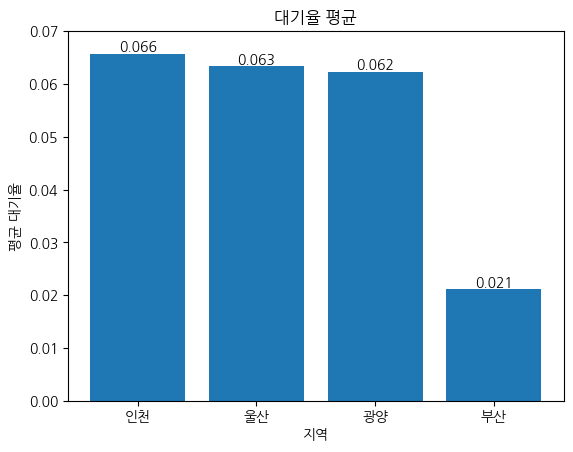

In [28]:
import matplotlib.pyplot as plt

# 각 데이터프레임에서 '대기율' 칼럼의 평균 계산
uls_mean = ULS['대기율'].mean()
pus_mean = F_PUS['대기율'].mean()
kan_mean = F_KAN['대기율'].mean()
inc_mean = F_INC['대기율'].mean()

# 막대 그래프 생성
categories = ['인천', '울산', '광양', '부산']
means = [inc_mean, uls_mean, kan_mean, pus_mean]

plt.bar(categories, means)

# y값의 범위 설정
plt.ylim(0, 0.07)

# 그래프 제목과 레이블 설정
plt.title('대기율 평균')
plt.xlabel('지역')
plt.ylabel('평균 대기율')

# 수치 표시
for i, mean in enumerate(means):
    plt.text(categories[i], mean, f'{mean:.3f}', ha='center', va='bottom')

# 그래프 표시
plt.show()
